### Case study: Cyclistic bike-share analysis for year 2023

#### Abount Company

Cyclistic, a bike-share program launched in 2016, has grown to include 5,824 bikes and 692 stations in Chicago. The bikes can be unlocked and returned at any station. The company offers flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Single-ride and full-day pass users are casual riders, while annual membership buyers are Cyclistic members.

Financial analysis shows that annual members are more profitable than casual riders. The current goal is to convert casual riders into annual members. Moreno, a team leader, believes this conversion is crucial for growth and aims to design marketing strategies to achieve it. To do so, the team needs to understand the differences between annual members and casual riders, motivations for casual riders to buy memberships, and the role of digital media in marketing. Analyzing historical bike trip data is key to identifying trends and informing these strategies.

#### Questions for Analysis

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?


#### Prepare

For the analysis, I utilized [Cyclistic’s Historical Trip Data](https://divvy-tripdata.s3.amazonaws.com/index.html) to identify trends. The data covers a period from January 1, 2023, to December 30, 2023, and is stored in CSV files, with each file representing one month's data, totaling 12 CSV files. The data is well-organized and structured.

Although the datasets have different names since Cyclistic is a fictional company, they are suitable for this case study. The data is provided by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement). Given that this data is from an actual bike-sharing company in Chicago, it is reliable, original, current, and properly cited (meeting the ROCCC criteria). However, it is not entirely comprehensive as it lacks certain information.

In terms of data integrity, it is accurate, consistent, and trustworthy.

### Peparing data for analysis

Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import glob 

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use(['dark_background']) #style

In [3]:
%matplotlib inline

### Importing data

In [4]:
df1=pd.read_csv('202301-divvy-tripdata.csv') #importing data from CSV files
df2=pd.read_csv('202302-divvy-tripdata.csv')
df3=pd.read_csv('202303-divvy-tripdata.csv')
df4=pd.read_csv('202304-divvy-tripdata.csv')
df5=pd.read_csv('202305-divvy-tripdata.csv')
df6=pd.read_csv('202306-divvy-tripdata.csv')
df7=pd.read_csv('202307-divvy-tripdata.csv')
df8=pd.read_csv('202308-divvy-tripdata.csv')
df9=pd.read_csv('202309-divvy-tripdata.csv')
df10=pd.read_csv('202310-divvy-tripdata.csv')
df11=pd.read_csv('202311-divvy-tripdata.csv')
df12=pd.read_csv('202312-divvy-tripdata.csv')

In [5]:
data = pd.concat( [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index = True) #merging all dataframes

In [6]:
data.shape

(5719877, 13)

In [7]:
data.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.926069,-87.638858,41.930000,-87.640000,member
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799554,-87.594617,41.809835,-87.599383,member
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799587,-87.594670,41.809835,-87.599383,member
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


### Data Cleaning

Removing data that is not needed for this analysis to improve performance

In [8]:
data = data.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])
data

,ride_id,rideable_type,started_at,ended_at,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member
...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,casual
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,casual
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,member
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,casual


Checking for duplicates

In [9]:
print(data.duplicated().sum())

0


In [10]:
data.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

#### Manipulating data
Splitting date and time to separate columns and fixing datatypes

In [11]:
data[['st_date','st_time']]=data.started_at.str.split(expand=True)

In [12]:
data[['end_date','end_time']]=data.ended_at.str.split(expand=True)

In [13]:
data["started_at"]=pd.to_datetime(data["started_at"])
data['ended_at']=pd.to_datetime(data['ended_at'])

In [14]:
data['st_date']=pd.to_datetime(data['st_date'])
data['end_date']=pd.to_datetime(data['end_date'])
data['end_time']=pd.to_datetime(data['end_time'])
data['st_time']=pd.to_datetime(data['st_time'])

In [15]:
data['day_of_week'] = data['started_at'].dt.dayofweek

In [16]:
data['hour']=data.st_time.dt.hour

In [17]:
data['ord_day']=data.started_at.dt.day_of_year

In [18]:
data['name_day']=data.st_date.dt.day_name()

In [19]:
data['name_day']=data.st_date.dt.day_name()

In [20]:
data['name_month']=data.started_at.dt.month_name()

In [21]:
data['num_month']=data.started_at.dt.month

In [22]:
data['total_ride_length']=data['ended_at']-data['started_at']

In [23]:
data['total_ride_length']=pd.to_numeric(data['total_ride_length'])/6e+10

In [24]:
data=data.drop(data[data['total_ride_length']<1].index) #removing negative values

In [25]:
data[data['total_ride_length']<1].count()

ride_id              0
rideable_type        0
started_at           0
ended_at             0
member_casual        0
st_date              0
st_time              0
end_date             0
end_time             0
day_of_week          0
hour                 0
ord_day              0
name_day             0
name_month           0
num_month            0
total_ride_length    0
dtype: int64

#### Analysing Data

In [26]:
data #top and bottom 5 rows of the final dataset 

,ride_id,rideable_type,started_at,ended_at,member_casual,st_date,st_time,end_date,end_time,day_of_week,hour,ord_day,name_day,name_month,num_month,total_ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,2023-01-21,2024-07-09 20:05:42,2023-01-21,2024-07-09 20:16:33,5,20,21,Saturday,January,1,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,2023-01-10,2024-07-09 15:37:36,2023-01-10,2024-07-09 15:46:05,1,15,10,Tuesday,January,1,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,2023-01-02,2024-07-09 07:51:57,2023-01-02,2024-07-09 08:05:11,0,7,2,Monday,January,1,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,2023-01-22,2024-07-09 10:52:58,2023-01-22,2024-07-09 11:01:44,6,10,22,Sunday,January,1,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,2023-01-12,2024-07-09 13:58:01,2023-01-12,2024-07-09 14:13:20,3,13,12,Thursday,January,1,15.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719872,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,casual,2023-12-07,2024-07-09 13:15:24,2023-12-07,2024-07-09 13:17:37,3,13,341,Thursday,December,12,2.216667
5719873,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,casual,2023-12-08,2024-07-09 18:42:21,2023-12-08,2024-07-09 18:45:56,4,18,342,Friday,December,12,3.583333
5719874,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,member,2023-12-05,2024-07-09 14:09:11,2023-12-05,2024-07-09 14:13:01,1,14,339,Tuesday,December,12,3.833333
5719875,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,casual,2023-12-02,2024-07-09 21:36:07,2023-12-02,2024-07-09 21:53:45,5,21,336,Saturday,December,12,17.633333


In [27]:
data.describe()

,started_at,ended_at,st_date,st_time,end_date,end_time,day_of_week,hour,ord_day,num_month,total_ride_length
count,5570262,5570262,5570262,5570262,5570262,5570262,5.570262e+06,5.570262e+06,5.570262e+06,5.570262e+06,5.570262e+06
mean,2023-07-16 19:10:09.162088448,2023-07-16 19:28:48.912187648,2023-07-16 04:34:37.007940352,2024-07-09 14:35:32.154150400,2023-07-16 04:43:53.695577344,2024-07-09 14:44:55.216607744,3.029594e+00,1.409146e+01,1.971907e+02,7.002842e+00,1.866250e+01
min,2023-01-01 00:02:06,2023-01-01 00:07:23,2023-01-01 00:00:00,2024-07-09 00:00:00,2023-01-01 00:00:00,2024-07-09 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2023-05-21 17:21:34.500000,2023-05-21 17:44:51.500000,2023-05-21 00:00:00,2024-07-09 11:09:29,2023-05-21 00:00:00,2024-07-09 11:20:05,1.000000e+00,1.100000e+01,1.410000e+02,5.000000e+00,5.700000e+00
50%,2023-07-21 06:40:50.500000,2023-07-21 07:01:09,2023-07-21 00:00:00,2024-07-09 15:26:46,2023-07-21 00:00:00,2024-07-09 15:39:38,3.000000e+00,1.500000e+01,2.020000e+02,7.000000e+00,9.800000e+00
75%,2023-09-17 01:36:05.750000128,2023-09-17 02:00:38,2023-09-17 00:00:00,2024-07-09 18:10:48,2023-09-17 00:00:00,2024-07-09 18:23:29,5.000000e+00,1.800000e+01,2.600000e+02,9.000000e+00,1.723333e+01
max,2023-12-31 23:58:55,2024-01-01 23:50:51,2023-12-31 00:00:00,2024-07-09 23:59:59,2024-01-01 00:00:00,2024-07-09 23:59:59,6.000000e+00,2.300000e+01,3.650000e+02,1.200000e+01,9.848907e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,1.950792e+00,4.940263e+00,8.286472e+01,2.720981e+00,1.825898e+02


In [28]:
member=data[data.member_casual=='member'] 

In [29]:
casual=data[data.member_casual=='casual']


In [30]:
d=data.member_casual.value_counts()
d=pd.DataFrame(d)
d.reset_index(drop=False, inplace=True)
d

,member_casual,count
0,member,3564512
1,casual,2005750


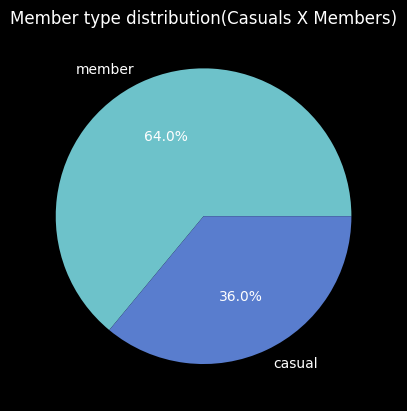

In [31]:
plt.pie(d['count'],labels=d['member_casual'],autopct='%1.1f%%',colors=['#6dc2ca', '#597dce','#ccff99'])
plt.title("Member type distribution(Casuals X Members)")
plt.show()

- Members: 64%
- Casual: 36%
This chart indicates that the majority of users are members, accounting for 64% of the total, while casual users make up 36%.

In [32]:
m3=member.rideable_type.value_counts()
m3=pd.DataFrame(m3)
m3.reset_index(drop=False, inplace=True)
m3

,rideable_type,count
0,classic_bike,1790185
1,electric_bike,1774327


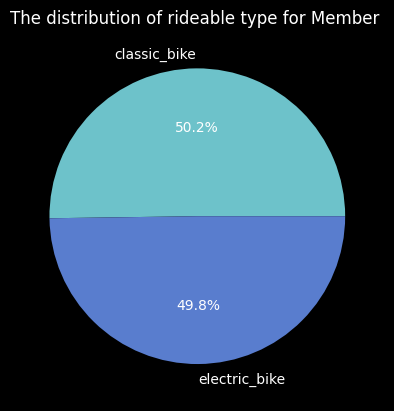

In [34]:
plt.pie(m3['count'],labels=m3['rideable_type'],autopct='%1.1f%%',colors=['#6dc2ca', '#597dce','#ccff99'])
plt.title("The distribution of rideable type for Member ")
plt.show()

- Classic Bike: 50.2%
- Electric Bike: 49.8%

Among members, the usage of classic bikes and electric bikes is almost evenly split, with classic bikes being slightly more popular at 50.2%.

In [35]:
c3=casual.rideable_type.value_counts()
c3=pd.DataFrame(c3)
c3.reset_index(drop=False, inplace=True)
c3

,rideable_type,count
0,electric_bike,1063621
1,classic_bike,864555
2,docked_bike,77574


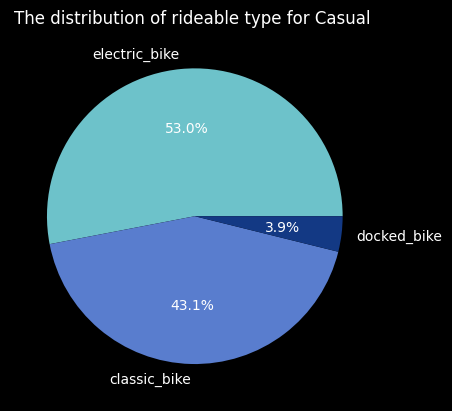

In [37]:
plt.pie(c3['count'],labels=c3['rideable_type'],autopct='%1.1f%%',colors=['#6dc2ca', '#597dce','#133984'])
plt.title("The distribution of rideable type for Casual ")
plt.show()

- Electric Bike: 53%
- Classic Bike: 43.1%
- Docked Bike: 3.9%

Casual users show a preference for electric bikes, which constitute 53% of their rides. Classic bikes account for 43.1%, and docked bikes are the least used at 3.9%.

In [38]:
m1=member.rideable_type.value_counts()
m1=pd.DataFrame(m1)
c1=casual.rideable_type.value_counts()
c1=pd.DataFrame(c1)

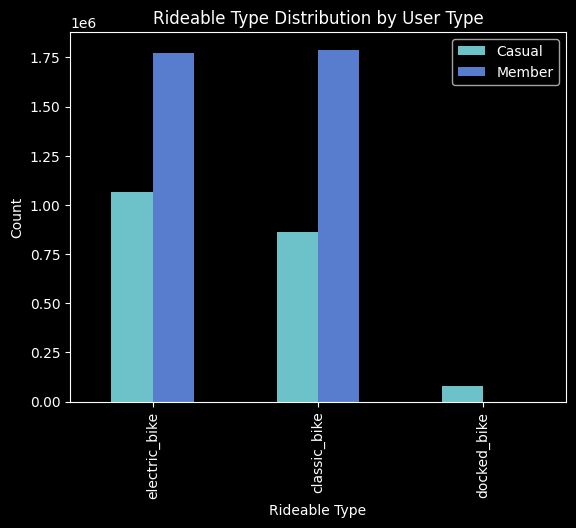

In [39]:
df = pd.concat([c1, m1] , axis=1)
df.columns = ['Casual', 'Member']
df.plot(kind='bar',color=['#6dc2ca', '#597dce'])
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.title('Rideable Type Distribution by User Type')
plt.show()

Electric and classic bikes are preferred by both user types, while docked bikes are less popular.

In [63]:
d2=data.name_month.value_counts()
d2=pd.DataFrame(d2)
d2.reset_index(drop=False, inplace=True)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d2['month_order'] = d2['name_month'].apply(lambda x: months_order.index(x))
d2_sorted = d2.sort_values(by='month_order')
d2_sorted.drop('month_order', axis=1, inplace=True)
d2_sorted

,name_month,count
11,January,184113
10,February,184444
8,March,249601
6,April,411607
4,May,586955
2,June,700835
1,July,747487
0,August,753322
3,September,652054
5,October,525420


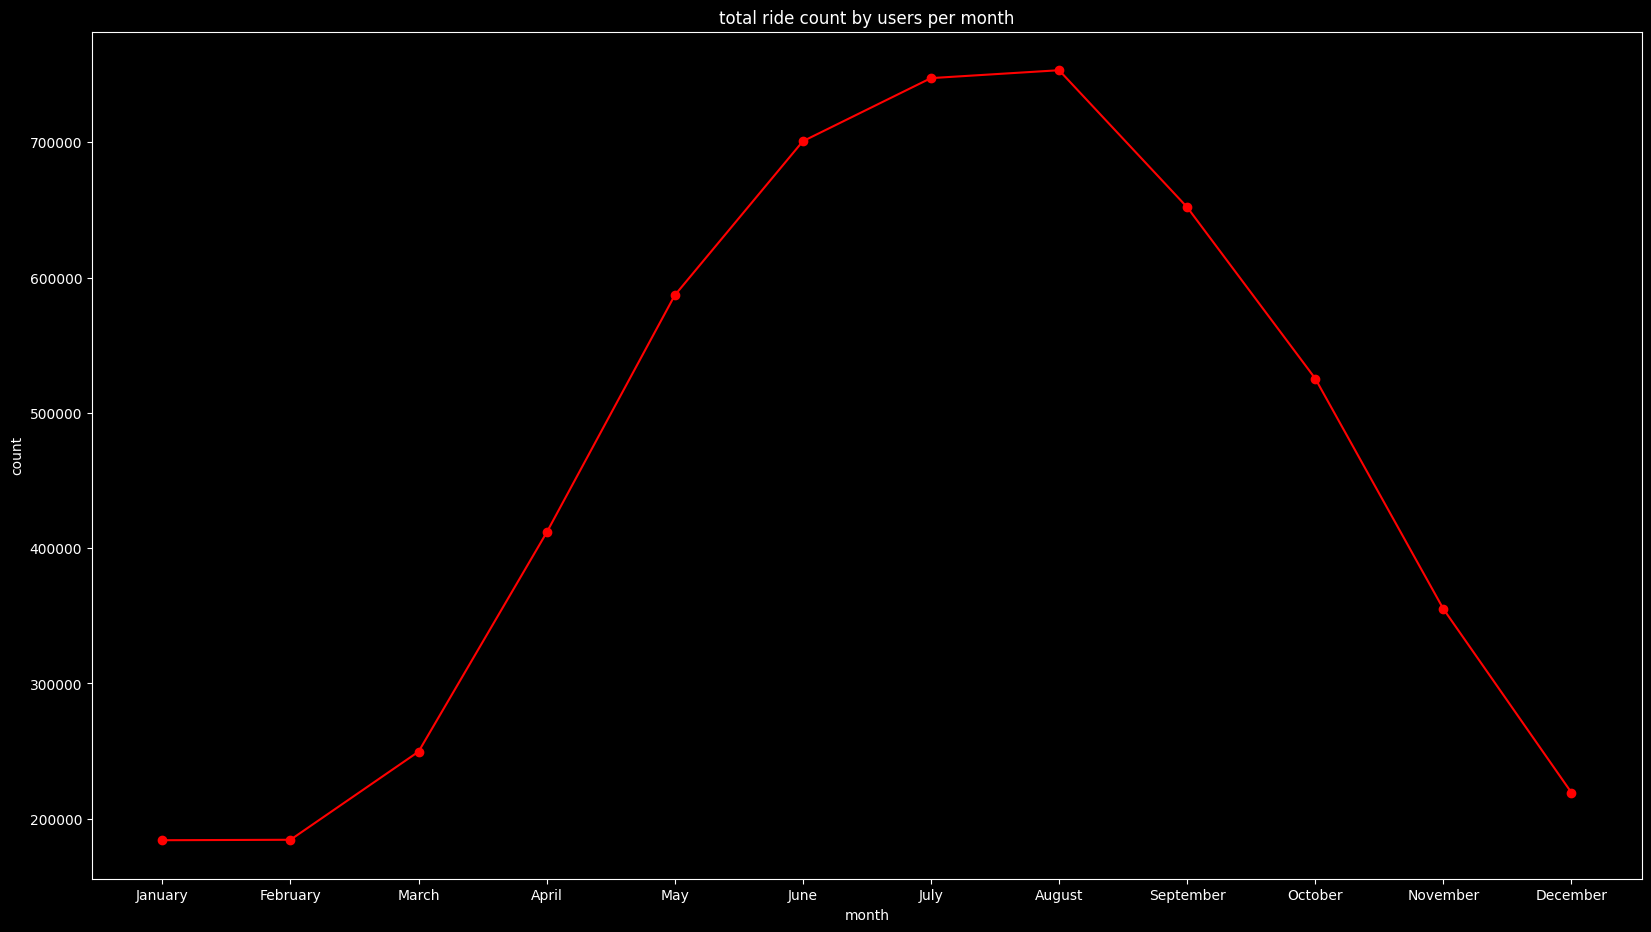

In [65]:
plt.figure(figsize=(20,11))
plt.plot(d2_sorted['name_month'],d2_sorted['count'],'ro-')
plt.title("total ride count by users per month")
plt.ylabel("count")
plt.xlabel("month")
plt.show()

The highest number of bike trips occurred between month of June and August.

In [44]:
m2=member.name_month.value_counts()
m2=pd.DataFrame(m2)
m2.reset_index(drop=False, inplace=True)
m2

,name_month,count
0,August,449587
1,July,424922
2,June,407789
3,September,396288
4,May,359580
5,October,352461
6,April,269086
7,November,258852
8,March,189322
9,December,168723


In [45]:
c2=casual.name_month.value_counts()
c2=pd.DataFrame(c2)
c2.reset_index(drop=False, inplace=True)
c2

,name_month,count
0,July,322565
1,August,303735
2,June,293046
3,September,255766
4,May,227375
5,October,172959
6,April,142521
7,November,96262
8,March,60279
9,December,50587


In [46]:
mrg1=pd.merge(m2,c2, on='name_month', how='outer', suffixes=('_member', '_casual'))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mrg1['month_order'] = mrg1['name_month'].apply(lambda x: months_order.index(x))
mrg_sorted1 = mrg1.sort_values(by='month_order')
mrg_sorted1.drop('month_order', axis=1, inplace=True)
mrg_sorted1

,name_month,count_member,count_casual
4,January,145276,38837
3,February,142626,41818
7,March,189322,60279
0,April,269086,142521
8,May,359580,227375
6,June,407789,293046
5,July,424922,322565
1,August,449587,303735
11,September,396288,255766
10,October,352461,172959


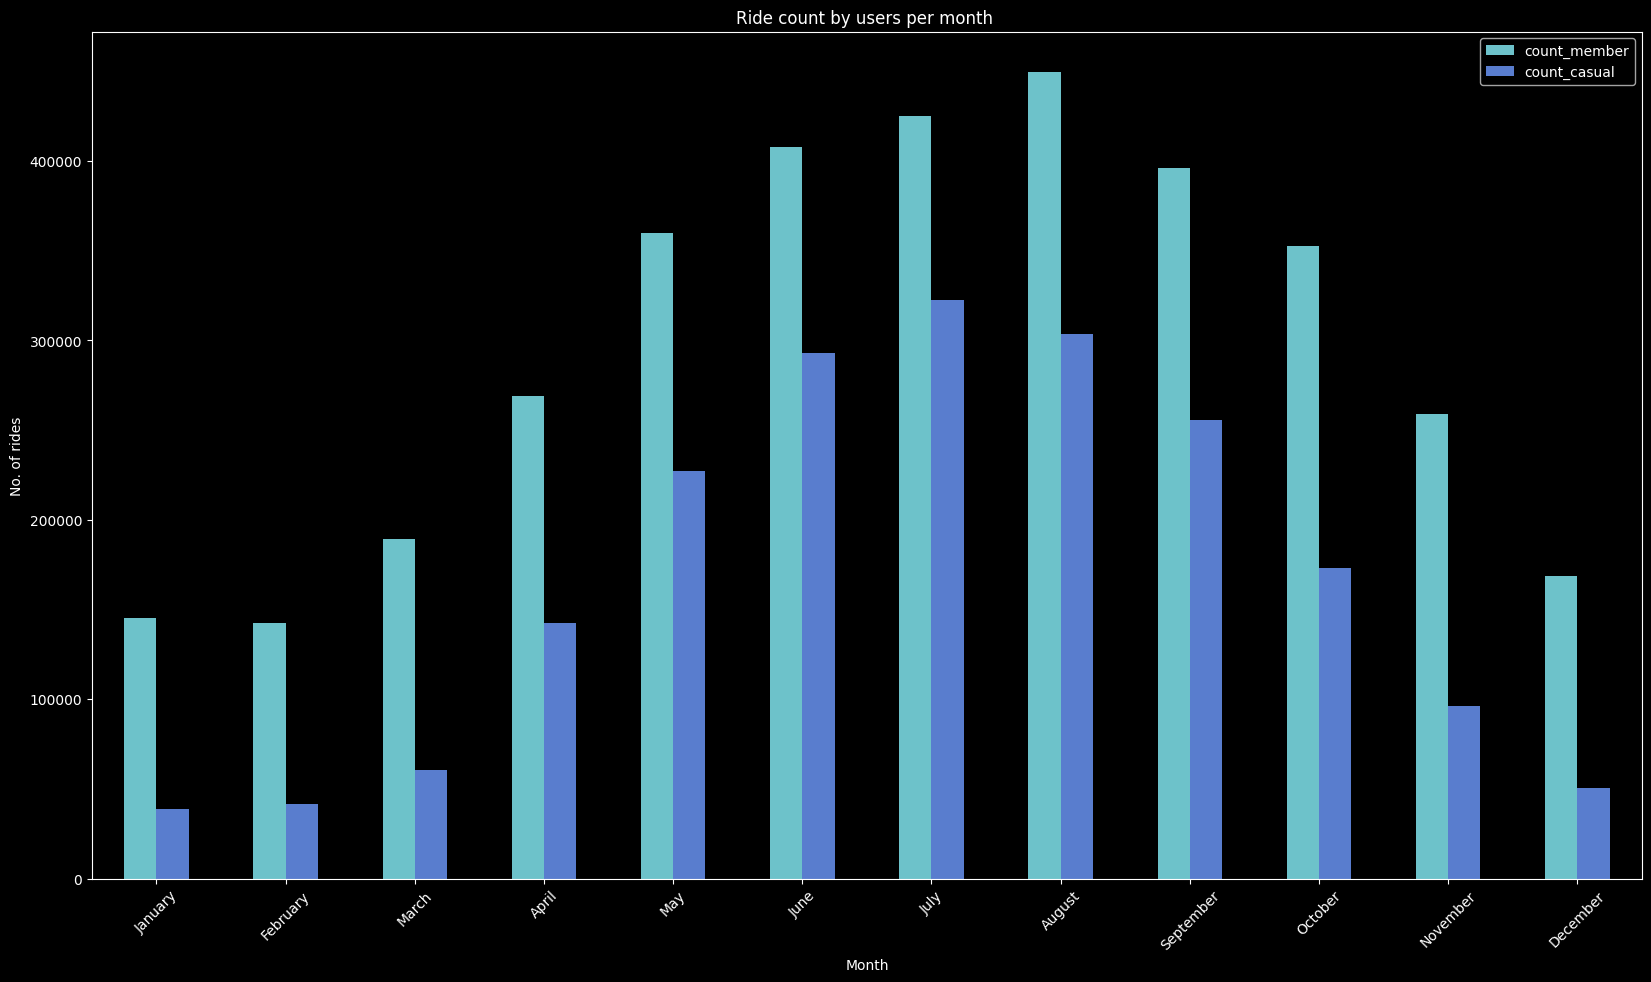

In [47]:
fig, ax = plt.subplots(figsize=(20,11))
mrg_sorted1.plot(kind='bar',color=['#6dc2ca', '#597dce'],ax=ax)
plt.title("Ride count by users per month ")
plt.ylabel("No. of rides")
plt.xlabel("Month") 
plt.xticks(np.arange(12), mrg_sorted1['name_month'], rotation=45)
plt.show()

1. Seasonal Trends:

    - Summer Peak: Months from June to August (June, July, August) show consistently high ride counts for both members and casual riders, with June and July having the highest overall counts.
    - Winter Decrease: Months from November to February (November, December, January, February) generally have lower ride counts, especially among casual riders.

2. Member vs. Casual Rider Usage:

    - Member Dominance: Across most months, members tend to have a higher number of rides compared to casual riders, indicating that members are more consistent in their usage throughout the year.
    - Casual Rider Spikes: There are noticeable spikes in casual rider counts during peak summer months (June, July, August), suggesting increased usage by occasional or seasonal users during vacation periods.

3. Annual Trends:

    - Overall Increase: The total number of rides generally increases from the beginning of the year (January) through the summer months, peaking in July.
    - Fall Decrease: Rides tend to decrease starting from September through December, reflecting seasonal trends and potentially cooler weather affecting ridership.

4. Implications for Marketing and Strategy:

    - Targeted Campaigns: Understanding these seasonal variations can help Cyclistic design targeted marketing campaigns to attract more casual riders during peak seasons and encourage membership during slower months.
    - Service Planning: Insights into member usage patterns can inform service planning and resource allocation, such as bike maintenance and station management.

In [48]:
m1=member.name_day.value_counts()
m1=pd.DataFrame(m1)
m1.reset_index(drop=False, inplace=True)
m1

,name_day,count
0,Thursday,573822
1,Wednesday,571585
2,Tuesday,561963
3,Friday,517281
4,Monday,481944
5,Saturday,459879
6,Sunday,398038


In [49]:
c1=casual.name_day.value_counts()
c1=pd.DataFrame(c1)
c1.reset_index(drop=False, inplace=True)
c1

,name_day,count
0,Saturday,399905
1,Sunday,326829
2,Friday,303857
3,Thursday,263642
4,Wednesday,242761
5,Tuesday,239914
6,Monday,228842


In [50]:
mrg=pd.merge(m1,c1, on='name_day', how='outer', suffixes=('_member', '_casual'))

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mrg['day_order'] = mrg['name_day'].apply(lambda x: weekdays_order.index(x))
mrg_sorted = mrg.sort_values(by='day_order')
mrg_sorted.drop('day_order', axis=1, inplace=True)
mrg_sorted

,name_day,count_member,count_casual
1,Monday,481944,228842
5,Tuesday,561963,239914
6,Wednesday,571585,242761
4,Thursday,573822,263642
0,Friday,517281,303857
2,Saturday,459879,399905
3,Sunday,398038,326829


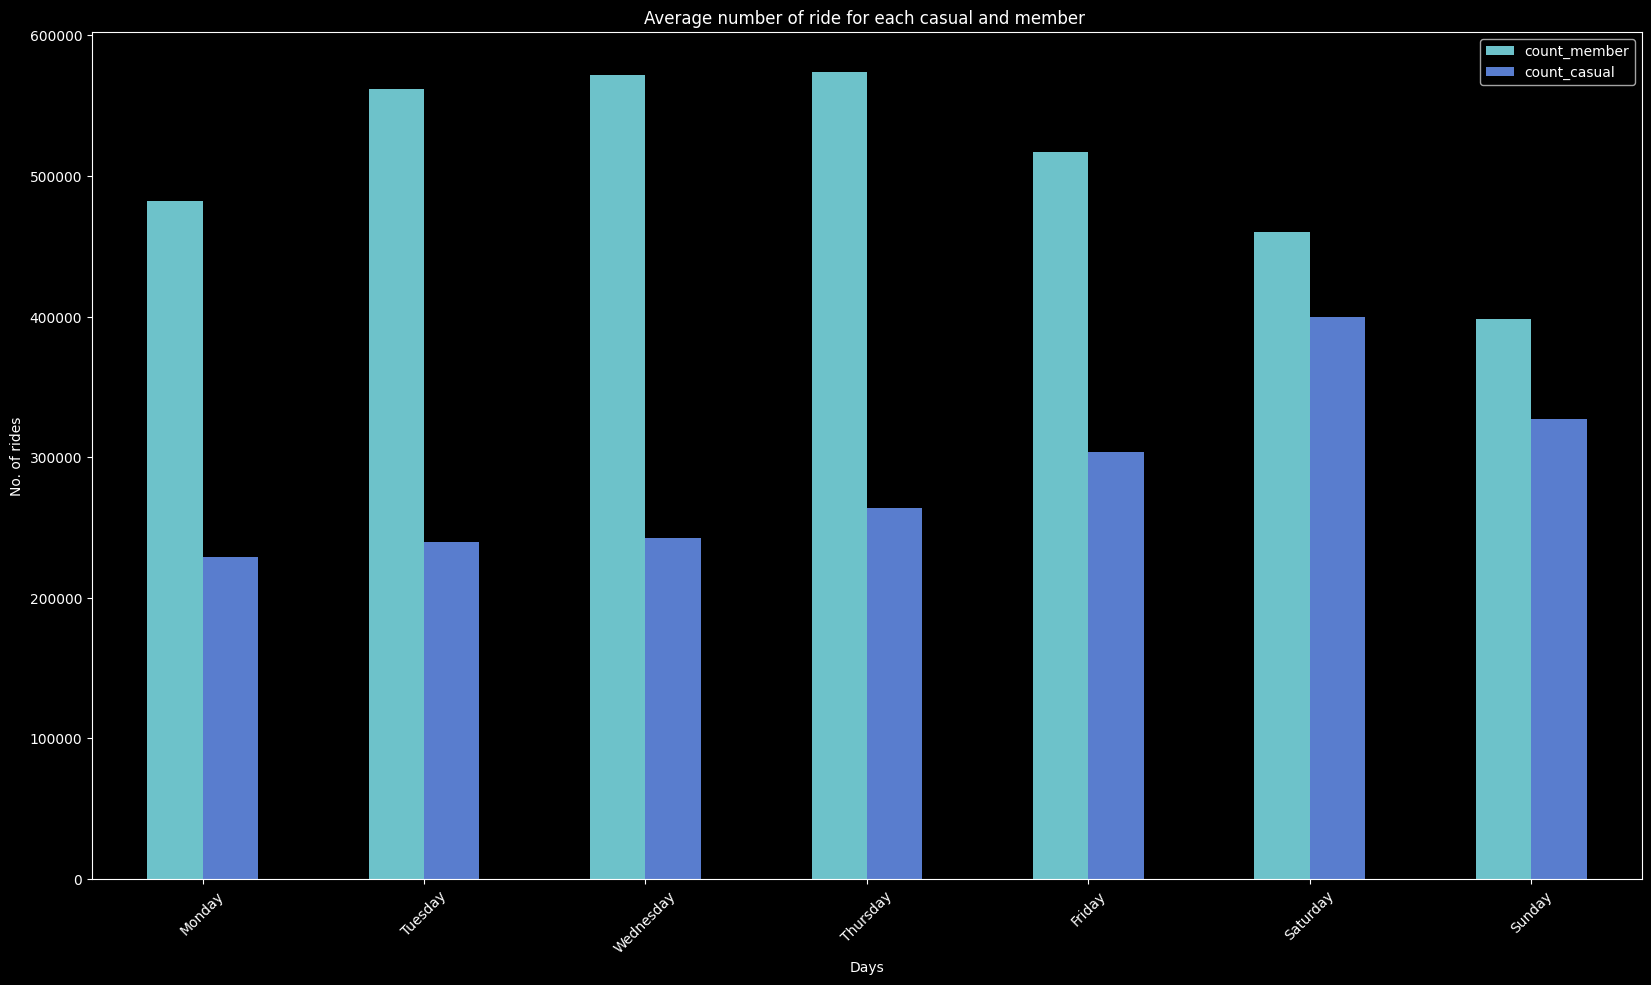

In [51]:
fig, ax = plt.subplots(figsize=(20,11))
mrg_sorted.plot(kind='bar',color=['#6dc2ca', '#597dce'],ax=ax)
plt.title("Average number of ride for each casual and member ")
plt.ylabel("No. of rides")
plt.xlabel("Days") 
plt.xticks(np.arange(7), mrg_sorted['name_day'],rotation=45)
plt.show()

1. Weekday vs. Weekend Usage:

    - Weekday Peaks: Thursday and Wednesday have the highest total ride counts, with 573,822 and 571,585 rides respectively. This suggests that members and casual riders alike tend to use Cyclistic bikes more on weekdays.
    - Weekend Decrease: Saturday and Sunday show lower total ride counts compared to weekdays, which aligns with typical commuter patterns where bike-sharing usage may decrease on weekends.

2. Member vs. Casual Rider Trends:

    - Member Dominance: Members consistently outnumber casual riders in ride counts across all days of the week. This indicates that members are more frequent users of the bike-share service, relying on it for regular commuting or daily transportation needs.
    - Casual Rider Spikes: While members generally dominate, there are notable spikes in casual rider counts on weekends (Saturday and Sunday). This suggests that casual riders might be more likely to use the service for recreational or leisure purposes during weekends.

3. Daily Patterns:

    - Midweek Consistency: Ride counts for both members and casual riders are relatively consistent from Monday to Thursday, with slight variations.
    - Friday Variation: Fridays show a higher count of rides compared to weekends, particularly among casual riders, which might indicate increased usage for social or weekend starting activities.

4. Implications for Strategy:

    - Targeted Promotions: Understanding these daily patterns can help Cyclistic tailor promotions and incentives to encourage more frequent usage, especially among casual riders during weekends.
    - Operational Planning: Insights into member usage can inform operational decisions such as bike deployment and station management during peak weekdays.

In [52]:
mh=member.hour.value_counts()
mh=pd.DataFrame(mh)
mh.reset_index(drop=False, inplace=True)
mh['hour'] = mh['hour'] + 1
mh_sorted = mh.sort_values('hour')
mh_sorted.head()

,hour,count
18,1,34485
20,2,20522
21,3,11906
23,4,7734
22,5,8489


In [53]:
ch=casual.hour.value_counts()
ch=pd.DataFrame(ch)
ch.reset_index(drop=False, inplace=True)
ch['hour'] = ch['hour'] + 1
ch_sorted = ch.sort_values('hour')
ch_sorted.head()

,hour,count
17,1,35781
19,2,23195
20,3,14018
22,4,7715
23,5,5811


In [71]:
mrg2=pd.merge(mh_sorted,ch_sorted, on='hour', how='outer', suffixes=('_member', '_casual'))
mrg2.head()

,hour,count_member,count_casual
0,1,34485,35781
1,2,20522,23195
2,3,11906,14018
3,4,7734,7715
4,5,8489,5811


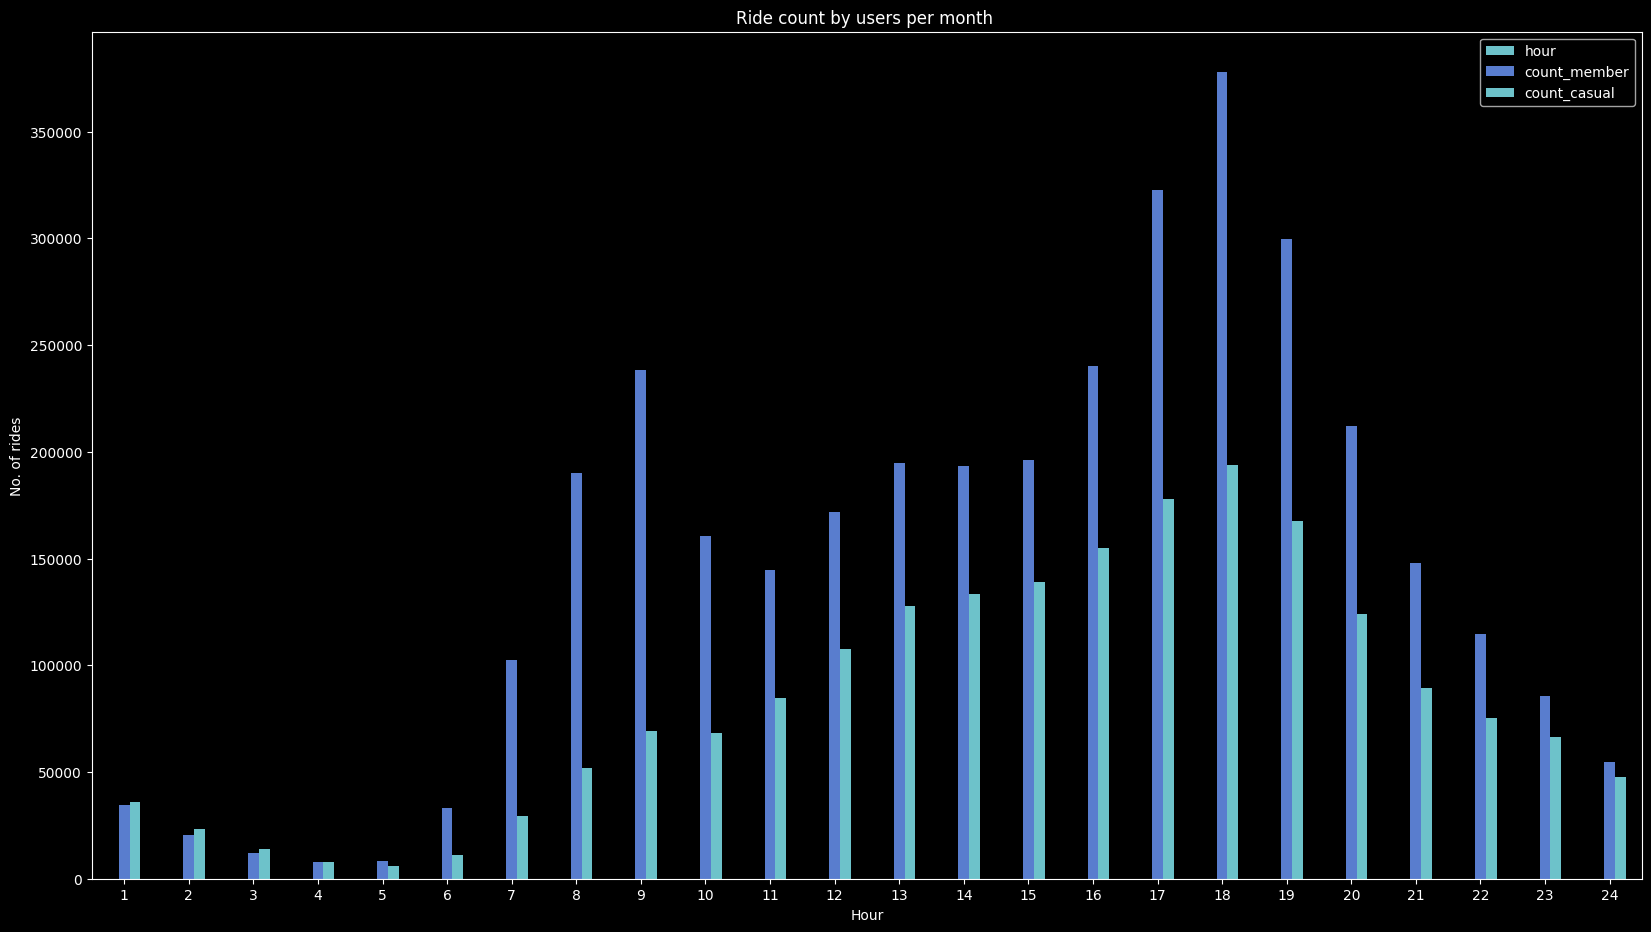

In [55]:
fig, ax = plt.subplots(figsize=(20,11))
mrg2.plot(kind='bar',color=['#6dc2ca', '#597dce'],ax=ax)
plt.title("Ride count by users per month ")
plt.ylabel("No. of rides")
plt.xlabel("Hour") 
plt.xticks(np.arange(24), mrg2['hour'], rotation=0) 
plt.show()

1. Peak Hours:

    - Evening Peak: The highest counts of rides occur during late afternoon to early evening hours, particularly between 4 PM and 6 PM (hour 16 to 18), for both members and casual riders. This suggests that many users utilize the bikes for commuting home from work or school.
    - Morning Surge: There's also a notable peak in the morning, particularly between 7 AM and 9 AM (hour 7 to 9), indicating morning commute usage primarily by members.

2. Usage Patterns Throughout the Day:

    - Member Dominance: Throughout most hours of the day, members tend to have higher ride counts compared to casual riders. This indicates that members are consistent users of the bike-sharing service for daily commuting or regular transportation needs.
    - Casual Rider Patterns: Casual riders show more fluctuation in their ride counts throughout the day, with peaks during late afternoon to evening hours, likely reflecting recreational or leisure use.

3. Late Night and Early Morning Usage:

    - Late Night Decline: Ride counts decrease significantly during late night and early morning hours (hour 0 to 5), indicating minimal usage during these times.
    - Potential for Service Adjustments: Understanding these patterns can help Cyclistic optimize bike deployment and station operations, ensuring bikes are available where and when they are most needed by riders.

4. Strategic Insights:

    - Targeted Marketing: Based on these usage patterns, Cyclistic could focus marketing efforts on promoting membership benefits for daily commuters during peak hours and offer incentives to casual riders during evening and weekend peaks.
    - Operational Efficiency: Insights into hourly usage can inform operational decisions such as scheduling maintenance, redistributing bikes, and managing station capacities more effectively.

In [56]:
d1=data.groupby("member_casual").agg({"total_ride_length":"mean"})
d1.reset_index(drop=False, inplace=True)
d1

,member_casual,total_ride_length
0,casual,28.987448
1,member,12.852657


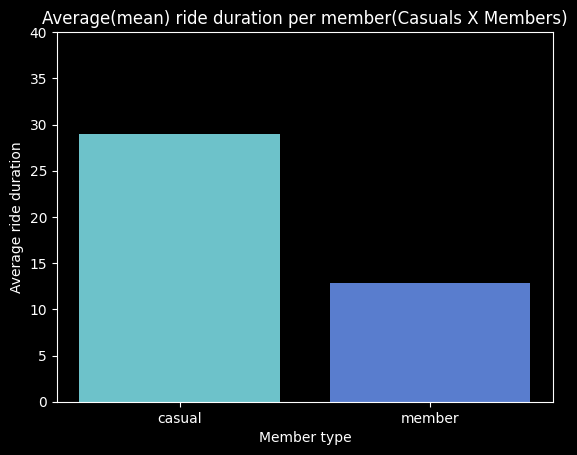

In [57]:
plt.bar(d1.member_casual,d1.total_ride_length,color=['#6dc2ca', '#597dce' ])
plt.title("Average(mean) ride duration per member(Casuals X Members)")
plt.ylabel("Average ride duration")
plt.xlabel("Member type")
plt.ylim(0,40)
plt.show()

1. Average Ride Length:

    - Casual Riders: On average, casual riders have longer bike rides with an average duration of approximately 28.99 minutes.
    - Members: Members, on the other hand, have shorter bike rides with an average duration of about 12.85 minutes.

2. Implications:

    - Usage Patterns: The longer average ride length for casual riders may indicate that they use the bikes for leisurely activities or longer-distance trips compared to members, who likely use the service more frequently for shorter commutes or routine travel.

In [58]:
m4=member.groupby("name_month").agg({"total_ride_length":"mean"})
m4.reset_index(drop=False, inplace=True)
m4

,name_month,total_ride_length
0,April,12.123603
1,August,14.098308
2,December,11.685570
3,February,11.062655
4,January,10.706461
5,July,14.046708
6,June,13.532983
7,March,10.823058
8,May,13.429322
9,November,11.799580


In [59]:
c4=casual.groupby("name_month").agg({"total_ride_length":"mean"})
c4.reset_index(drop=False, inplace=True)
c4

,name_month,total_ride_length
0,April,28.584172
1,August,36.090705
2,December,20.354585
3,February,23.845751
4,January,23.593841
5,July,33.202546
6,June,30.216061
7,March,22.082546
8,May,29.360879
9,November,20.324220


In [60]:
mrg4=pd.merge(m4,c4, on='name_month', how='outer', suffixes=('_member', '_casual'))

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mrg4['month_order'] = mrg4['name_month'].apply(lambda x: months_order.index(x))
mrg_sorted4 = mrg4.sort_values(by='month_order')
mrg_sorted4.drop('month_order', axis=1, inplace=True)
mrg_sorted4

,name_month,total_ride_length_member,total_ride_length_casual
4,January,10.706461,23.593841
3,February,11.062655,23.845751
7,March,10.823058,22.082546
0,April,12.123603,28.584172
8,May,13.429322,29.360879
6,June,13.532983,30.216061
5,July,14.046708,33.202546
1,August,14.098308,36.090705
11,September,13.416386,25.752194
10,October,12.402766,23.403470


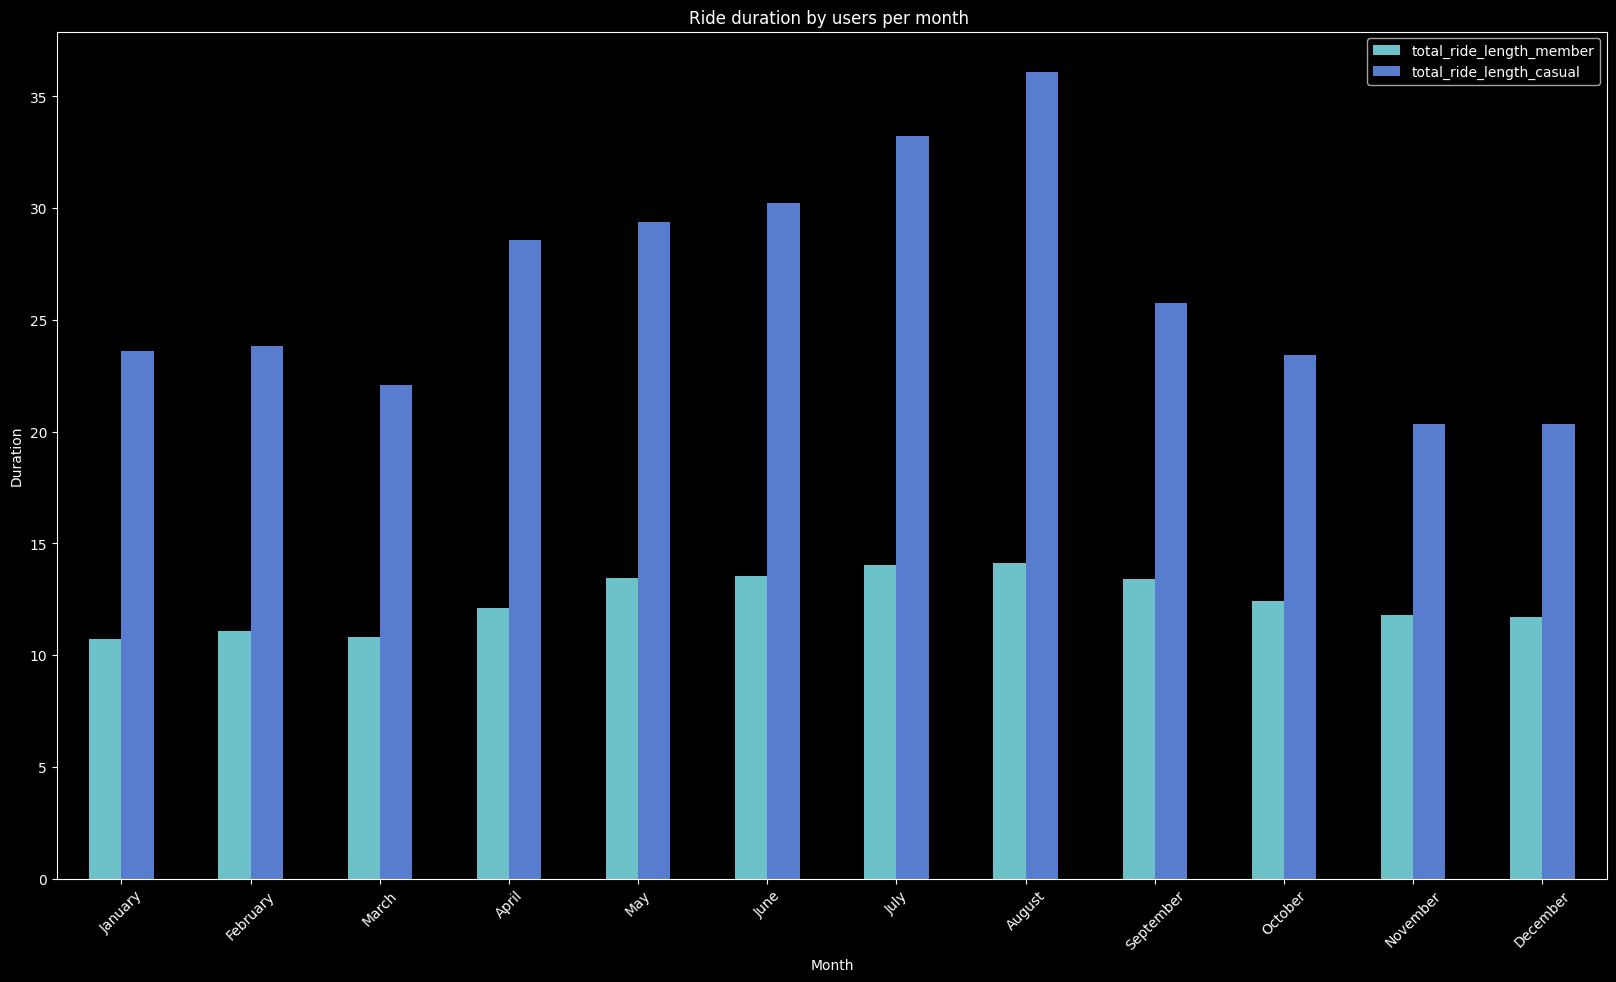

In [74]:
fig, ax = plt.subplots(figsize=(20,11))
mrg_sorted4.plot(kind='bar',color=['#6dc2ca', '#597dce'],ax=ax)
plt.title("Ride duration by users per month ")
plt.ylabel("Duration")
plt.xlabel("Month") 
plt.xticks(np.arange(12), mrg_sorted4['name_month'], rotation=45)
plt.show()

1. Seasonal Trends in Ride Length:

    - Summer Peaks: Months from June to August (June, July, August) consistently show the longest average ride lengths for both members and casual riders. This suggests that users tend to take longer rides during the warmer months, possibly for leisure or recreational purposes.
    - Winter Decrease: Ride lengths tend to be shorter during winter months (December to February), which may indicate reduced bike usage for commuting or outdoor activities during colder weather.

2. Member vs. Casual Rider Patterns:

    - Consistent Differences: Throughout the year, casual riders generally have longer average ride lengths compared to members. This pattern holds across most months, indicating that casual riders may use the bikes for longer trips or more extended periods compared to members who might use the service for shorter, more frequent trips.

3. Monthly Variations:

    - August Peak: August shows the highest average ride lengths for both groups, suggesting peak summer usage patterns.

4. Strategic Insights:

    - Service Planning: Understanding these seasonal and monthly variations can help Cyclistic optimize bike deployment, station management, and maintenance schedules to meet the differing needs of riders throughout the year.
    - Marketing and Promotions: Tailoring marketing campaigns and promotions based on these insights can help attract and retain riders during peak months and encourage usage during quieter periods.

### Recommendations

Based on the analyses of Cyclistic's bike-share data, here are several recommendations for improving service delivery, attracting more riders, and maximizing the conversion of casual riders into annual members:

1. Targeted Marketing Campaigns:

    - Design marketing strategies that target casual riders during peak usage periods, such as weekends and summer months. Highlight the convenience and benefits of becoming a member, including cost savings and priority access.
    - Use digital media effectively to reach potential members, emphasizing the flexibility and cost-effectiveness of annual memberships compared to single-ride or day-pass options.

2. Promotional Incentives:

    - Offer promotions and discounts specifically aimed at converting casual riders into members. For instance, provide discounted membership rates for first-time sign-ups or introduce referral programs where current members can earn rewards for referring new members.
    - Tailor promotional offers based on seasonal trends and rider preferences identified in the data, such as longer rides during summer and leisure activities.

3. Service Optimization:

    - Based on hourly and daily usage patterns, adjust bike deployment and station capacities to meet peak demand, especially during commuting hours and weekends.
    - Ensure that stations are well-maintained and strategically located in areas with high rider traffic, enhancing convenience for both members and casual riders.

4. Enhanced Customer Experience:

    - Improve the overall customer experience through user-friendly mobile apps and intuitive station interfaces. Simplify the membership sign-up process and provide real-time updates on bike availability and station statuses.
    - Gather feedback from current members and casual riders to identify pain points and areas for improvement, focusing on enhancing service reliability and user satisfaction.

5. Data-Driven Decision Making:

    - Continue analyzing historical trip data to monitor trends and adjust strategies accordingly. Use predictive analytics to forecast future demand and optimize resource allocation, such as bike inventory and station capacity.
    - Implement A/B testing for marketing campaigns to evaluate effectiveness and refine strategies based on performance metrics.

6. Community Engagement:

    - Foster a sense of community among Cyclistic users through events, social media engagement, and partnerships with local businesses. Highlight the environmental benefits and community impact of bike-sharing to attract socially conscious riders.

By implementing these recommendations, Cyclistic can effectively capitalize on its existing user base, attract new riders, and enhance overall operational efficiency and customer satisfaction in its bike-share program.